In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('city_day.csv')
df.head()


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [3]:
df.shape


(29531, 16)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [5]:
df.isnull().sum()


,0
City,0
Date,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854


In [6]:
df = df[df['AQI'].notna()]

df.shape



(24850, 16)

In [7]:
df = df[['City','Date','PM2.5','PM10','NO2','CO','SO2','O3','AQI']]

df.head()


,City,Date,PM2.5,PM10,NO2,CO,SO2,O3,AQI
28,Ahmedabad,2015-01-29,83.13,NaN,28.71,6.93,49.52,59.76,209.0
29,Ahmedabad,2015-01-30,79.84,NaN,28.68,13.85,48.49,97.07,328.0
30,Ahmedabad,2015-01-31,94.52,NaN,32.66,24.39,67.39,111.33,514.0
31,Ahmedabad,2015-02-01,135.99,NaN,42.08,43.48,75.23,102.70,782.0
32,Ahmedabad,2015-02-02,178.33,NaN,35.31,54.56,55.04,107.38,914.0


In [8]:
df = df.fillna(df.median(numeric_only=True))

df.isnull().sum()


,0
City,0
Date,0
PM2.5,0
PM10,0
NO2,0
CO,0
SO2,0
O3,0
AQI,0


In [9]:
df['Date'] = pd.to_datetime(df['Date'])

df = df.sort_values('Date')

df.head()


,City,Date,PM2.5,PM10,NO2,CO,SO2,O3,AQI
10229,Delhi,2015-01-01,313.22,607.98,36.39,15.20,9.25,41.68,472.0
10230,Delhi,2015-01-02,186.18,269.55,32.87,9.54,6.65,29.97,454.0
10231,Delhi,2015-01-03,87.18,131.90,30.31,10.61,2.65,19.71,143.0
10232,Delhi,2015-01-04,151.84,241.84,36.91,11.54,4.63,25.36,319.0
10233,Delhi,2015-01-05,146.60,219.13,34.92,9.20,3.33,23.20,325.0


#DAY2

#Defining features and target

In [10]:
X = df[['PM2.5','PM10','NO2','CO','SO2','O3']]
y = df['AQI']

#Train Test Split

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training samples:", X_train.shape)
print("Testing samples:", X_test.shape)

Training samples: (19880, 6)
Testing samples: (4970, 6)


#Linear Regression Model

In [12]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

#Evaluation (Linear Regression )

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print("Linear Regression Results:")
print("MAE:", mean_absolute_error(y_test, lr_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, lr_pred)))
print("R2 Score:", r2_score(y_test, lr_pred))

Linear Regression Results:
MAE: 30.803132202828714
RMSE: 57.955789030679725
R2 Score: 0.8289458901661109


In [14]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print("Random Forest Results:")
print("MAE:", mean_absolute_error(y_test, rf_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, rf_pred)))
print("R2:", r2_score(y_test, rf_pred))

Random Forest Results:
MAE: 22.56817970122822
RMSE: 50.03027042214586
R2: 0.8725307095948287


In [16]:
!pip install xgboost

In [17]:
from xgboost import XGBRegressor

xgb = XGBRegressor()

xgb.fit(X_train, y_train)

xgb_pred = xgb.predict(X_test)

In [18]:
print("XGBoost Results:")
print("MAE:", mean_absolute_error(y_test, xgb_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, xgb_pred)))
print("R2:", r2_score(y_test, xgb_pred))

XGBoost Results:
MAE: 23.359601635232536
RMSE: 50.3694767132849
R2: 0.8707963610314741


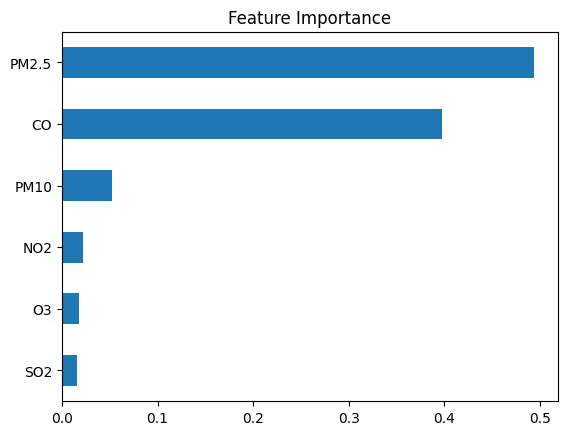

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

feature_importance = pd.Series(rf.feature_importances_, index=X.columns)

feature_importance.sort_values().plot(kind='barh')

plt.title("Feature Importance")
plt.show()

In [20]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'MAE': [
        mean_absolute_error(y_test, lr_pred),
        mean_absolute_error(y_test, rf_pred),
        mean_absolute_error(y_test, xgb_pred)
    ],
    'R2': [
        r2_score(y_test, lr_pred),
        r2_score(y_test, rf_pred),
        r2_score(y_test, xgb_pred)
    ]
})

results

,Model,MAE,R2
0,Linear Regression,30.803132,0.828946
1,Random Forest,22.568180,0.872531
2,XGBoost,23.359602,0.870796


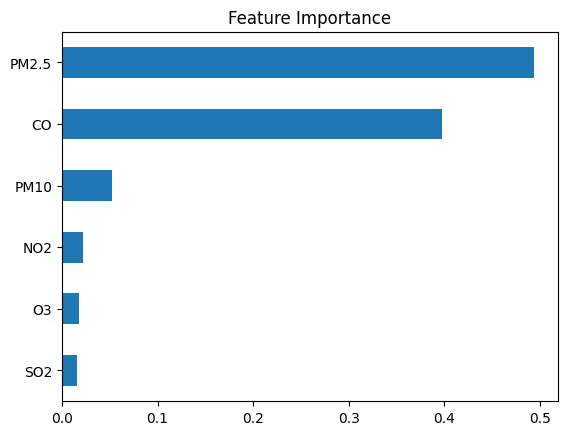

In [21]:
feature_importance = pd.Series(rf.feature_importances_, index=X.columns)

feature_importance.sort_values().plot(kind='barh')

plt.title("Feature Importance")
plt.show()